In [1]:
# Imporing pandas and numpy for Data wrangaling and numerical operations. 
import pandas as pd
import numpy as np

# Importing libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Imporing estimators such as decision tree, random forest and Gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing Smote to sinthatically increase minority data classes.
from imblearn.over_sampling import SMOTE

# Importing perforamce validation metrics for various models that we are going to use.
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
df  = pd.read_csv('ZS.csv')
origional_df = df
df

C:\Users\lenovo\.conda\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,9,10,11,13,14,16,27,28,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,train_file.csv,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143137,2032383-20160716,2465962.0,63376.0,180.0,INTERPARK LLC,INTERPARK,505 N STATE ST 2-4,CHICAGO,IL,60654.0,...,2016-07-16T00:00:00,2018-07-15T00:00:00,2016-06-23T00:00:00,2016-08-11T00:00:00,2018-01-09T00:00:00,NaN,41.891055,-87.627898,"{'latitude': '41.89105524147196', 'longitude':...",NaN
143138,40376-20020216,1211199.0,55051.0,1.0,YUN HEE HWANG,TOP CLEANERS,1201 W ROSCOE ST 1ST,CHICAGO,IL,60657.0,...,2002-02-16T00:00:00,2003-02-15T00:00:00,2002-01-18T00:00:00,2002-01-22T00:00:00,NaN,NaN,41.943382,-87.659191,"{'latitude': '41.94338183750669', 'longitude':...",NaN
143139,2064176-20121116,2188497.0,357381.0,1.0,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,7052 W 64TH ST 1ST,CHICAGO,IL,60638.0,...,2012-11-16T00:00:00,2014-11-15T00:00:00,2012-12-25T00:00:00,2012-12-26T00:00:00,2012-12-29T00:00:00,NaN,41.77571,-87.798009,"{'latitude': '41.775709631013335', 'longitude'...",NaN
143140,1954052-20090202,1954052.0,340610.0,1.0,maria t bedoy,mari's cleaning services,4544 S CHRISTIANA AVE 1,CHICAGO,IL,60632.0,...,2009-02-02T00:00:00,2009-06-15T00:00:00,2009-01-31T00:00:00,2009-02-02T00:00:00,NaN,39.0,41.810523,-87.707872,"{'latitude': '41.81052250782054', 'longitude':...",NaN


In [3]:
df.shape

(143142, 32)

In [4]:
list(df.columns)

['train_file.csv',
 'LICENSE ID',
 'ACCOUNT NUMBER',
 'SITE NUMBER',
 'LEGAL NAME',
 'DOING BUSINESS AS NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP CODE',
 'WARD',
 'PRECINCT',
 'WARD PRECINCT',
 'POLICE DISTRICT',
 'LICENSE CODE',
 'LICENSE DESCRIPTION',
 'LICENSE NUMBER',
 'APPLICATION TYPE',
 'APPLICATION CREATED DATE',
 'APPLICATION REQUIREMENTS COMPLETE',
 'PAYMENT DATE',
 'CONDITIONAL APPROVAL',
 'LICENSE TERM START DATE',
 'LICENSE TERM EXPIRATION DATE',
 'LICENSE APPROVED FOR ISSUANCE',
 'DATE ISSUED',
 'LICENSE STATUS CHANGE DATE',
 'SSA',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'LICENSE STATUS']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143142 entries, 0 to 143141
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   train_file.csv                     143139 non-null  object
 1   LICENSE ID                         143141 non-null  object
 2   ACCOUNT NUMBER                     143135 non-null  object
 3   SITE NUMBER                        143135 non-null  object
 4   LEGAL NAME                         143135 non-null  object
 5   DOING BUSINESS AS NAME             143132 non-null  object
 6   ADDRESS                            143135 non-null  object
 7   CITY                               143135 non-null  object
 8   STATE                              143135 non-null  object
 9   ZIP CODE                           143092 non-null  object
 10  WARD                               92808 non-null   object
 11  PRECINCT                           84856 non-null   

In [6]:
# calculating Percent null values in each feature.

df.isna().mean()*100

train_file.csv                        0.002096
LICENSE ID                            0.000699
ACCOUNT NUMBER                        0.004890
SITE NUMBER                           0.004890
LEGAL NAME                            0.004890
DOING BUSINESS AS NAME                0.006986
ADDRESS                               0.004890
CITY                                  0.004890
STATE                                 0.004890
ZIP CODE                              0.034930
WARD                                 35.163684
PRECINCT                             40.719006
WARD PRECINCT                        35.155999
POLICE DISTRICT                      38.768496
LICENSE CODE                          0.004890
LICENSE DESCRIPTION                   0.004890
LICENSE NUMBER                        0.005589
APPLICATION TYPE                      0.004890
APPLICATION CREATED DATE             76.325607
APPLICATION REQUIREMENTS COMPLETE     0.453396
PAYMENT DATE                          1.639631
CONDITIONAL A

In [7]:
'''
we are removing those feature variables which have null values more than 70% and those does not bing any value for 
final prediction.

'''

df.drop(columns = ['APPLICATION CREATED DATE','SSA','train_file.csv','LEGAL NAME','ADDRESS','WARD','WARD PRECINCT',
                 'LICENSE DESCRIPTION','APPLICATION REQUIREMENTS COMPLETE','PAYMENT DATE','CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE','LICENSE STATUS CHANGE DATE','DOING BUSINESS AS NAME','DATE ISSUED','LOCATION'], inplace  = True)
df

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
0,1256593,32811,1,CHICAGO,IL,60623.0,28.0,10.0,1010,35342.0,RENEW,41.843613,-87.714618,AAI
1,1639294,262311,29,CHICAGO,IL,60618,23.0,17.0,1315,1358463.0,RENEW,41.961132,-87.699626,AAC
2,1980233,345008,1,HIGHLAND,IL,60035,NaN,NaN,1011,1980233.0,ISSUE,NaN,NaN,AAI
3,1476582,273121,1,LEMONT,IL,60439,NaN,NaN,1010,1476582.0,ISSUE,NaN,NaN,AAI
4,1896750,213785,1,WAUKEGAN,IL,60087,NaN,NaN,1010,1141408.0,RENEW,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143137,2465962.0,63376.0,180.0,CHICAGO,IL,60654.0,22.0,18.0,1002.0,2032383.0,RENEW,41.891055,-87.627898,NaN
143138,1211199.0,55051.0,1.0,CHICAGO,IL,60657.0,9.0,19.0,1010.0,40376.0,RENEW,41.943382,-87.659191,NaN
143139,2188497.0,357381.0,1.0,CHICAGO,IL,60638.0,18.0,8.0,1012.0,2064176.0,RENEW,41.77571,-87.798009,NaN
143140,1954052.0,340610.0,1.0,CHICAGO,IL,60632.0,10.0,8.0,1012.0,1954052.0,ISSUE,41.810523,-87.707872,NaN


In [8]:
df.shape

(143142, 14)

In [9]:
df.duplicated().sum()

1

We have only one duplicate value.

In [10]:
df.drop_duplicates(inplace  = True)
df

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
0,1256593,32811,1,CHICAGO,IL,60623.0,28.0,10.0,1010,35342.0,RENEW,41.843613,-87.714618,AAI
1,1639294,262311,29,CHICAGO,IL,60618,23.0,17.0,1315,1358463.0,RENEW,41.961132,-87.699626,AAC
2,1980233,345008,1,HIGHLAND,IL,60035,NaN,NaN,1011,1980233.0,ISSUE,NaN,NaN,AAI
3,1476582,273121,1,LEMONT,IL,60439,NaN,NaN,1010,1476582.0,ISSUE,NaN,NaN,AAI
4,1896750,213785,1,WAUKEGAN,IL,60087,NaN,NaN,1010,1141408.0,RENEW,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143137,2465962.0,63376.0,180.0,CHICAGO,IL,60654.0,22.0,18.0,1002.0,2032383.0,RENEW,41.891055,-87.627898,NaN
143138,1211199.0,55051.0,1.0,CHICAGO,IL,60657.0,9.0,19.0,1010.0,40376.0,RENEW,41.943382,-87.659191,NaN
143139,2188497.0,357381.0,1.0,CHICAGO,IL,60638.0,18.0,8.0,1012.0,2064176.0,RENEW,41.77571,-87.798009,NaN
143140,1954052.0,340610.0,1.0,CHICAGO,IL,60632.0,10.0,8.0,1012.0,1954052.0,ISSUE,41.810523,-87.707872,NaN


In [11]:
df.columns

Index(['LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE',
       'ZIP CODE', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'LATITUDE', 'LONGITUDE',
       'LICENSE STATUS'],
      dtype='object')

In [12]:
df['LICENSE ID'].isna().sum()

1

In [13]:
df['LICENSE ID'] = df['LICENSE ID'].fillna(df['LICENSE ID'].mode()[0])

C:\Users\lenovo\.conda\anaconda\lib\site-packages\pandas\core\algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


In [14]:
df['LICENSE ID'].isna().sum()

0

In [15]:
df[df['LICENSE ID'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


In [16]:
 df['LICENSE ID'] = pd.to_numeric(df['LICENSE ID'], errors='coerce').astype('float32')

In [17]:
df['LICENSE ID'].dtype

dtype('float32')

In [18]:
df[df['LICENSE ID'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
85895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85901,NaN,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,NaN


In [19]:
# Dropping all rows whose all records are null.

df.drop([85895,85896,85897,85898,85900,85901,143141], axis=0, inplace=True)

In [20]:
df[df['LICENSE ID'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


### Account Number 

In [21]:
df['ACCOUNT NUMBER'].isna().sum()

0

In [22]:
df['ACCOUNT NUMBER']

0            32811
1           262311
2           345008
3           273121
4           213785
            ...   
143136    266103.0
143137     63376.0
143138     55051.0
143139    357381.0
143140    340610.0
Name: ACCOUNT NUMBER, Length: 143134, dtype: object

In [23]:
df['ACCOUNT NUMBER'] = df['ACCOUNT NUMBER'].fillna(df['ACCOUNT NUMBER'].mode()[0])

In [24]:
df['ACCOUNT NUMBER'].isna().sum()

0

In [25]:
df['ACCOUNT NUMBER'] = pd.to_numeric(df['ACCOUNT NUMBER'], errors='coerce').astype('float32')

In [26]:
df[df['ACCOUNT NUMBER'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


#### SITE NUMBER

In [27]:
df['SITE NUMBER'].nunique()

446

In [28]:
df['SITE NUMBER'] = df['SITE NUMBER'].fillna(df['SITE NUMBER'].mode()[0])

In [29]:
df['SITE NUMBER'] = pd.to_numeric(df['SITE NUMBER'], errors='coerce').astype('float64')

In [30]:
df['SITE NUMBER']

0           1.0
1          29.0
2           1.0
3           1.0
4           1.0
          ...  
143136      3.0
143137    180.0
143138      1.0
143139      1.0
143140      1.0
Name: SITE NUMBER, Length: 143134, dtype: float64

#### CITY

In [31]:
df['CITY'].nunique()

1311

In [32]:
df['CITY'].isna().sum()

0

In [33]:
df['CITY'] = df['CITY'].fillna(df['CITY'].mode()[0])

In [34]:
df['CITY'] = df['CITY'].astype('category')

In [35]:
df['CITY'].isna().sum()

0

#### STATE

In [36]:
df['STATE'].nunique()

55

In [37]:
df['STATE'].isnull().sum()

0

In [38]:
df['STATE'] = df['STATE'].fillna(df['STATE'].mode()[0])

In [39]:
df['STATE'] = df['STATE'].astype('category')

In [40]:
df['STATE'].isna().sum()

0

In [41]:
df['STATE'].value_counts().head(10)

IL    137458
IN      1768
WI       555
CA       381
MI       372
NY       237
TX       201
OH       197
MO       170
MN       160
Name: STATE, dtype: int64

#### ZIP CODE

In [42]:
 df['ZIP CODE'].nunique()

2418

In [43]:
df['ZIP CODE'].isna().sum()

43

In [44]:
df[df['ZIP CODE'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
3327,1341459.0,7049.0,4.0,CHICAGO,IL,NaN,NaN,NaN,1010,17256.0,RENEW,41.738136,-87.74112,AAI
3859,2196802.0,64342.0,8.0,CHICAGO,IL,NaN,NaN,NaN,1010,2196802.0,ISSUE,NaN,NaN,AAI
5056,1232380.0,7049.0,4.0,CHICAGO,IL,NaN,NaN,NaN,1010,17256.0,RENEW,41.738136,-87.74112,AAI
6426,2103590.0,63584.0,97.0,CHICAGO,IL,NaN,NaN,NaN,1008,2103590.0,ISSUE,41.995029,-87.885823,AAC
6742,2303508.0,369630.0,1.0,CHICAGO,IL,NaN,NaN,NaN,1010,2138250.0,RENEW,NaN,NaN,AAI
7456,2129487.0,368011.0,1.0,CHICAGO,IL,NaN,NaN,NaN,1010,2129487.0,ISSUE,41.881683,-87.659667,AAI
15275,2124609.0,367163.0,1.0,CHICAGO,IL,NaN,NaN,NaN,1010,2124609.0,ISSUE,NaN,NaN,AAI
15482,2103591.0,63584.0,97.0,CHICAGO,IL,NaN,NaN,NaN,1010,2103591.0,ISSUE,41.995029,-87.885823,AAC
23917,1200768.0,64307.0,5.0,CHICAGO,IL,NaN,NaN,NaN,1010,55007.0,RENEW,NaN,NaN,AAI
25720,2370313.0,64342.0,8.0,CHICAGO,IL,NaN,NaN,NaN,1010,2196802.0,RENEW,NaN,NaN,AAI


In [45]:
df['ZIP CODE'] = df['ZIP CODE'].fillna(df['ZIP CODE'].mode()[0])

In [46]:
# df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'],errors = 'coerce').astype('Int32')

In [47]:
df['ZIP CODE'].isna().sum()

0

In [48]:
df[df['ZIP CODE'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


#### 'PRECINCT'

In [49]:
df['PRECINCT'].isna().sum()

58279

In [50]:
df['PRECINCT'] = df['PRECINCT'].fillna(df['PRECINCT'].mode()[0])

In [51]:
# Converting object Data type to float64

df['PRECINCT'] = pd.to_numeric(df['PRECINCT'], errors = 'coerce').astype('float64')

In [52]:
df[df['PRECINCT'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


In [53]:
df['PRECINCT'].isna().sum()

0

#### POLICE DISTRICT

In [54]:
df['POLICE DISTRICT'].isna().sum()

55487

In [55]:
df['POLICE DISTRICT']

0         10.0
1         17.0
2          NaN
3          NaN
4          NaN
          ... 
143136     8.0
143137    18.0
143138    19.0
143139     8.0
143140     8.0
Name: POLICE DISTRICT, Length: 143134, dtype: object

In [56]:
df['POLICE DISTRICT'] = df['POLICE DISTRICT'].fillna(df['POLICE DISTRICT'].mode()[0])

In [57]:
df['POLICE DISTRICT'].isna().sum()

0

In [58]:
# Converting object Data type to float64
df['POLICE DISTRICT'] = pd.to_numeric(df['POLICE DISTRICT'], errors = 'coerce').astype('float64')

In [59]:
df['POLICE DISTRICT']

0         10.0
1         17.0
2         18.0
3         18.0
4         18.0
          ... 
143136     8.0
143137    18.0
143138    19.0
143139     8.0
143140     8.0
Name: POLICE DISTRICT, Length: 143134, dtype: float64

In [60]:
df['POLICE DISTRICT'].isna().sum()

0

#### 'LICENSE CODE'

In [61]:
df['LICENSE CODE'].isna().sum()

0

In [62]:
df[df['LICENSE CODE'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


In [63]:
df['LICENSE CODE'].nunique()

237

In [64]:
# filling nan values by most frequent record

df['LICENSE CODE'] = df['LICENSE CODE'].fillna(df['LICENSE CODE'].mode()[0])

In [65]:
df['LICENSE CODE'].isna().sum()

0

In [66]:
df['LICENSE CODE'] = pd.to_numeric(df['LICENSE CODE'], errors  = 'coerce').astype('float64')

In [67]:
df['LICENSE CODE']

0         1010.0
1         1315.0
2         1011.0
3         1010.0
4         1010.0
           ...  
143136    1010.0
143137    1002.0
143138    1010.0
143139    1012.0
143140    1012.0
Name: LICENSE CODE, Length: 143134, dtype: float64

In [68]:
df[df['LICENSE CODE'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


In [69]:
df.columns

Index(['LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE',
       'ZIP CODE', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'LATITUDE', 'LONGITUDE',
       'LICENSE STATUS'],
      dtype='object')

##### LICENSE NUMBER

In [70]:
df['LICENSE NUMBER']

0           35342.0
1         1358463.0
2         1980233.0
3         1476582.0
4         1141408.0
            ...    
143136    1743194.0
143137    2032383.0
143138      40376.0
143139    2064176.0
143140    1954052.0
Name: LICENSE NUMBER, Length: 143134, dtype: object

In [71]:
df['LICENSE NUMBER'].isna().sum()

1

In [72]:
df['LICENSE NUMBER'] = df['LICENSE NUMBER'].fillna(df['LICENSE NUMBER'].mode()[0])

In [73]:
df['LICENSE NUMBER'].isna().sum()

0

In [74]:
df['LICENSE NUMBER']  = pd.to_numeric(df['LICENSE NUMBER'], errors  = 'coerce').astype('float64')

### APPLICATION TYPE

In [75]:
df['APPLICATION TYPE'].value_counts()

RENEW     105221
ISSUE      35770
C_LOC       2081
C_EXPA        33
C_CAPA        24
C_SBA          5
Name: APPLICATION TYPE, dtype: int64

In [76]:
df['APPLICATION TYPE'].nunique()

6

In [77]:
df['APPLICATION TYPE'].isnull().sum()

0

In [78]:
df[df['APPLICATION TYPE'].isnull()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS


In [79]:
df['APPLICATION TYPE'] = df['APPLICATION TYPE'].fillna(df['APPLICATION TYPE'].mode()[0])

In [80]:
df['APPLICATION TYPE'].isnull().sum()

0

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143134 entries, 0 to 143140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   LICENSE ID        143134 non-null  float32 
 1   ACCOUNT NUMBER    143134 non-null  float32 
 2   SITE NUMBER       143134 non-null  float64 
 3   CITY              143134 non-null  category
 4   STATE             143134 non-null  category
 5   ZIP CODE          143134 non-null  object  
 6   PRECINCT          143134 non-null  float64 
 7   POLICE DISTRICT   143134 non-null  float64 
 8   LICENSE CODE      143134 non-null  float64 
 9   LICENSE NUMBER    143134 non-null  float64 
 10  APPLICATION TYPE  143134 non-null  object  
 11  LATITUDE          94978 non-null   object  
 12  LONGITUDE         94978 non-null   object  
 13  LICENSE STATUS    85895 non-null   object  
dtypes: category(2), float32(2), float64(5), object(5)
memory usage: 13.6+ MB


#### LATITUDE

In [82]:
df['LATITUDE'].value_counts().head(10)

41.908728562    537
41.888074281    292
41.819441426    270
41.857616887    232
41.754660124    172
41.892249163    151
42.008536401    149
41.844511469    149
41.881921563    143
41.878560154    141
Name: LATITUDE, dtype: int64

In [83]:
df['LATITUDE'].isnull().sum()

48156

In [84]:
df['LATITUDE']  = pd.to_numeric(df['LATITUDE'], errors  = 'coerce').astype('float32')

In [85]:
df['LATITUDE'] = df['LATITUDE'].fillna(df['LATITUDE'].median())

In [86]:
df['LATITUDE'].isna().sum()

0

#### LONGITUDE

In [87]:
df['LONGITUDE'].isna().sum()

48156

In [88]:
df['LONGITUDE'].value_counts()

-87.654726445         537
-87.63495520299999    292
-87.665375545         270
-87.63607109200001    232
-87.741384759         172
                     ... 
-87.65426594700001      1
-87.668446496           1
-87.682944529           1
-87.75934058899999      1
-87.707872417           1
Name: LONGITUDE, Length: 46666, dtype: int64

In [89]:
df['LONGITUDE']  = pd.to_numeric(df['LONGITUDE'], errors  = 'coerce').astype('float32')

In [90]:
df['LONGITUDE']  = df['LONGITUDE'].fillna(df['LONGITUDE'].mode()[0])

In [91]:
df['LONGITUDE'].isna().sum()

0

In [92]:
df

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
0,1256593.0,32811.0,1.0,CHICAGO,IL,60623.0,28.0,10.0,1010.0,35342.0,RENEW,41.843613,-87.714615,AAI
1,1639294.0,262311.0,29.0,CHICAGO,IL,60618,23.0,17.0,1315.0,1358463.0,RENEW,41.961132,-87.699623,AAC
2,1980233.0,345008.0,1.0,HIGHLAND,IL,60035,9.0,18.0,1011.0,1980233.0,ISSUE,41.892204,-87.654724,AAI
3,1476582.0,273121.0,1.0,LEMONT,IL,60439,9.0,18.0,1010.0,1476582.0,ISSUE,41.892204,-87.654724,AAI
4,1896750.0,213785.0,1.0,WAUKEGAN,IL,60087,9.0,18.0,1010.0,1141408.0,RENEW,41.892204,-87.654724,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143136,1835677.0,266103.0,3.0,CHICAGO,IL,60652.0,14.0,8.0,1010.0,1743194.0,RENEW,41.749844,-87.688736,NaN
143137,2465962.0,63376.0,180.0,CHICAGO,IL,60654.0,22.0,18.0,1002.0,2032383.0,RENEW,41.891056,-87.627899,NaN
143138,1211199.0,55051.0,1.0,CHICAGO,IL,60657.0,9.0,19.0,1010.0,40376.0,RENEW,41.943382,-87.659187,NaN
143139,2188497.0,357381.0,1.0,CHICAGO,IL,60638.0,18.0,8.0,1012.0,2064176.0,RENEW,41.775711,-87.798012,NaN


#### LICENSE STATUS

In [93]:
df['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [94]:
df[df['LICENSE STATUS'].isna()]

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
85902,2132209.0,280120.0,1.0,CHICAGO,IL,60610,67.0,18.0,1020.0,1516615.0,RENEW,41.890049,-87.637466,NaN
85903,2090759.0,65043.0,1.0,CHICAGO,IL,60636.0,5.0,7.0,1010.0,69813.0,RENEW,41.786484,-87.676666,NaN
85904,1541990.0,281270.0,1.0,CHICAGO,IL,60605,8.0,1.0,1020.0,1519227.0,RENEW,41.868271,-87.625694,NaN
85905,2041053.0,335243.0,1.0,CHICAGO,IL,60827,33.0,5.0,1607.0,1922025.0,RENEW,41.655762,-87.608688,NaN
85906,1837158.0,283018.0,3.0,CHICAGO,IL,60632,26.0,9.0,1010.0,1675683.0,RENEW,41.816971,-87.699783,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143136,1835677.0,266103.0,3.0,CHICAGO,IL,60652.0,14.0,8.0,1010.0,1743194.0,RENEW,41.749844,-87.688736,NaN
143137,2465962.0,63376.0,180.0,CHICAGO,IL,60654.0,22.0,18.0,1002.0,2032383.0,RENEW,41.891056,-87.627899,NaN
143138,1211199.0,55051.0,1.0,CHICAGO,IL,60657.0,9.0,19.0,1010.0,40376.0,RENEW,41.943382,-87.659187,NaN
143139,2188497.0,357381.0,1.0,CHICAGO,IL,60638.0,18.0,8.0,1012.0,2064176.0,RENEW,41.775711,-87.798012,NaN


C:\Users\lenovo\.conda\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LICENSE STATUS', ylabel='count'>

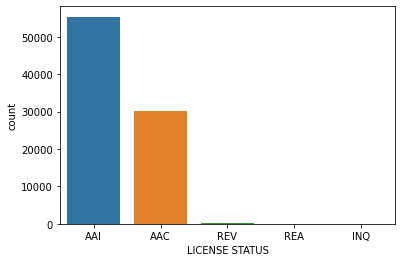

In [95]:

sns.countplot(df['LICENSE STATUS'])

In [96]:
df['LICENSE STATUS'] = df['LICENSE STATUS'].astype('category')

#### we have Imbalanced dataset here, so to make it balanced we will use SMOTE method

In [97]:
# pd.set_option('display.max_rows', None)

In [98]:
df['LICENSE STATUS']

0         AAI
1         AAC
2         AAI
3         AAI
4         AAI
         ... 
143136    NaN
143137    NaN
143138    NaN
143139    NaN
143140    NaN
Name: LICENSE STATUS, Length: 143134, dtype: category
Categories (5, object): ['AAC', 'AAI', 'INQ', 'REA', 'REV']

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143134 entries, 0 to 143140
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   LICENSE ID        143134 non-null  float32 
 1   ACCOUNT NUMBER    143134 non-null  float32 
 2   SITE NUMBER       143134 non-null  float64 
 3   CITY              143134 non-null  category
 4   STATE             143134 non-null  category
 5   ZIP CODE          143134 non-null  object  
 6   PRECINCT          143134 non-null  float64 
 7   POLICE DISTRICT   143134 non-null  float64 
 8   LICENSE CODE      143134 non-null  float64 
 9   LICENSE NUMBER    143134 non-null  float64 
 10  APPLICATION TYPE  143134 non-null  object  
 11  LATITUDE          143134 non-null  float32 
 12  LONGITUDE         143134 non-null  float32 
 13  LICENSE STATUS    85895 non-null   category
dtypes: category(3), float32(4), float64(5), object(2)
memory usage: 15.5+ MB


In [100]:
train  = df.dropna()
train 

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,APPLICATION TYPE,LATITUDE,LONGITUDE,LICENSE STATUS
0,1256593.0,32811.0,1.0,CHICAGO,IL,60623.0,28.0,10.0,1010.0,35342.0,RENEW,41.843613,-87.714615,AAI
1,1639294.0,262311.0,29.0,CHICAGO,IL,60618,23.0,17.0,1315.0,1358463.0,RENEW,41.961132,-87.699623,AAC
2,1980233.0,345008.0,1.0,HIGHLAND,IL,60035,9.0,18.0,1011.0,1980233.0,ISSUE,41.892204,-87.654724,AAI
3,1476582.0,273121.0,1.0,LEMONT,IL,60439,9.0,18.0,1010.0,1476582.0,ISSUE,41.892204,-87.654724,AAI
4,1896750.0,213785.0,1.0,WAUKEGAN,IL,60087,9.0,18.0,1010.0,1141408.0,RENEW,41.892204,-87.654724,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,2143400.0,8011.0,1.0,CHICAGO,IL,60607,28.0,1.0,1008.0,12652.0,RENEW,41.863503,-87.642212,AAC
85891,1821421.0,317725.0,1.0,MACHESNEY PARK,IL,61115,9.0,18.0,1800.0,1821421.0,ISSUE,41.892204,-87.654724,AAI
85892,1939358.0,8458.0,2.0,DOWNERS GROVE,IL,60515,9.0,18.0,1010.0,74137.0,RENEW,41.892204,-87.654724,AAI
85893,2110060.0,2156.0,43.0,CHICAGO,IL,60632.0,9.0,18.0,1010.0,2049545.0,RENEW,41.799011,-87.723183,AAC


In [101]:
x  = train.drop(['LICENSE STATUS','CITY','ZIP CODE'], axis = 1)
y  = train['LICENSE STATUS']


In [102]:
x  = pd.get_dummies(x, drop_first = True)

In [103]:
x.memory_usage()

Index                      687160
LICENSE ID                 343580
ACCOUNT NUMBER             343580
SITE NUMBER                687160
PRECINCT                   687160
                            ...  
STATE_WY                    85895
APPLICATION TYPE_C_EXPA     85895
APPLICATION TYPE_C_LOC      85895
APPLICATION TYPE_ISSUE      85895
APPLICATION TYPE_RENEW      85895
Length: 68, dtype: int64

In [104]:
y.value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [105]:

smote  = SMOTE( k_neighbors=1)
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()


AAC    55400
AAI    55400
INQ    55400
REA    55400
REV    55400
Name: LICENSE STATUS, dtype: int64

In [ ]:
x_sm.memory_usage()

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_sm,y_sm, test_size= 0.3 , random_state = 2)

In [107]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((193900, 67), (193900,), (83100, 67), (83100,))

In [108]:
df.columns

Index(['LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE',
       'ZIP CODE', 'PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'LATITUDE', 'LONGITUDE',
       'LICENSE STATUS'],
      dtype='object')

In [109]:

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
pred = tree.predict(x_test)
pred

array(['REV', 'REA', 'REA', ..., 'INQ', 'REV', 'INQ'], dtype=object)

In [111]:
print(confusion_matrix(y_test,pred))

[[15007  1450     0     5   145]
 [ 1443 15031     0     0     9]
 [    0     0 16556     0     0]
 [    1     0     0 16702     0]
 [   70    10     0     5 16666]]


In [112]:

print(" The accuracy score for Decision Tree model is  :", accuracy_score(y_test, pred))
print(" The precision score for Decision Tree model is :" ,precision_score(y_test,pred,average='weighted'))
print(" The recall score for Decision Tree model is    :",recall_score(y_test,pred,average='weighted'))
print(" The f1 score for Decision Tree model is        :", f1_score(y_test, pred,average='weighted'))

 The accuracy score for Decision Tree model is  : 0.9622382671480144
 The precision score for Decision Tree model is : 0.9621596182597808
 The recall score for Decision Tree model is    : 0.9622382671480144
 The f1 score for Decision Tree model is        : 0.9621968518013704


In [113]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         AAC       0.91      0.90      0.91     16607
         AAI       0.91      0.91      0.91     16483
         INQ       1.00      1.00      1.00     16556
         REA       1.00      1.00      1.00     16703
         REV       0.99      0.99      0.99     16751

    accuracy                           0.96     83100
   macro avg       0.96      0.96      0.96     83100
weighted avg       0.96      0.96      0.96     83100



from above classification report it seems that model is overfitting on our data.So to validate these results we 
can do cross validation.

In [114]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier()
scores  = cross_val_score(tree,x_train,y_train,cv = 5, scoring = 'f1_weighted')
scores

array([0.96100779, 0.96076948, 0.96077616, 0.9612617 , 0.95943436])

In [115]:
scores.mean()

0.9606498964207058

#### 2. Model : Random Forest

In [116]:

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

rfc_pred = rfc.predict(x_test)
rfc_pred

array(['REV', 'REA', 'REA', ..., 'INQ', 'REV', 'INQ'], dtype=object)

In [117]:
print( "The accuracy score for random forest model is   :",  accuracy_score(y_test,rfc_pred))
print( "The precision score for random forest model is  :",  precision_score(y_test,rfc_pred,average='weighted'))

print( "The recall score for random forest model is     :", recall_score(y_test,rfc_pred,average='weighted'))
print( "The f1 score for random forest model is         :", f1_score(y_test,rfc_pred,average='weighted'))

print ("The confusion matrix : \n ", confusion_matrix(y_test,rfc_pred))

The accuracy score for random forest model is   : 0.9768592057761732
The precision score for random forest model is  : 0.9770939780085212
The recall score for random forest model is     : 0.9768592057761732
The f1 score for random forest model is         : 0.9768620408475082
The confusion matrix : 
  [[15941   662     0     0     4]
 [ 1229 15254     0     0     0]
 [    0     0 16556     0     0]
 [    0     0     0 16703     0]
 [   27     1     0     0 16723]]


#### Cross Validation for random forest classifier

In [118]:
rfc = RandomForestClassifier()
rfc_score  = cross_val_score(rfc, x_train,y_train, cv = 5, scoring  = 'f1_weighted')
rfc_score

array([0.97535329, 0.9755318 , 0.97596782, 0.97594383, 0.97432038])

In [119]:
rfc_score.mean()

0.9754234224365556

#### 3. Model : Gradientboost classifier

In [125]:

gbc  = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predic = gbc.predict(x_test)

In [128]:
print( "The accuracy score for random forest model is   :",  accuracy_score(y_test,predic))
print( "The precision score for random forest model is  :",  precision_score(y_test,predic,average='weighted'))

print( "The recall score for random forest model is     :", recall_score(y_test,predic,average='weighted'))
print( "The f1 score for random forest model is         :", f1_score(y_test,predic,average='weighted'))

print ("The confusion matrix : \n ", confusion_matrix(y_test,predic))

The accuracy score for random forest model is   : 0.9565703971119134
The precision score for random forest model is  : 0.9564072028015913
The recall score for random forest model is     : 0.9565703971119134
The f1 score for random forest model is         : 0.9563902681387072
The confusion matrix : 
  [[14606   930     0     4  1067]
 [ 1088 15362     0     0    33]
 [    0     0 16556     0     0]
 [    0     0     0 16703     0]
 [  486     1     0     0 16264]]


#### Model perforamce after hyperparameter Tuning.

In [129]:
gb  = GradientBoostingClassifier(max_depth= 6, max_features= 0.4, n_estimators= 40)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

In [130]:
print( "the accuracy score for Gradient Boosing calssifier model is  :",  accuracy_score(y_test, gb_pred))

print( "the precision score for Gradient Boosing calssifier model is :",  precision_score(y_test, gb_pred,average='weighted'))
print( "the recall score for Gradient Boosing calssifier model is    :",  recall_score(y_test, gb_pred,average='weighted'))

print( "the f1 score for Gradient Boosing calssifier model is        :",  f1_score(y_test, gb_pred,average='weighted'))
print ("the confusion matrix for GBC model is \n ", confusion_matrix(y_test, gb_pred))

the accuracy score for Gradient Boosing calssifier model is  : 0.965812274368231
the precision score for Gradient Boosing calssifier model is : 0.9656755144678081
the recall score for Gradient Boosing calssifier model is    : 0.965812274368231
the f1 score for Gradient Boosing calssifier model is        : 0.9656866631398775
the confusion matrix for GBC model is 
  [[15108   840     0     5   654]
 [ 1125 15344     0     0    14]
 [    0     0 16556     0     0]
 [    0     0     0 16703     0]
 [  201     2     0     0 16548]]


Gradient boosting classifier working well with great f1 score of 96.5%.